In [ ]:
Link to the PPT
https://docs.google.com/presentation/d/1EEAd881xAAfqQC0GRCsoZklz82f3fJSQ/edit?usp=sharing&ouid=110719950334218607626&rtpof=true&sd=true

In [199]:
import pandas as pd #Import and Upload the required packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from math import pi
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn import tree
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [4]:
survey=pd.read_csv("pulse2020_puf_01.csv") #upload the dataset and assign a name to it
survey.dataframeName="pulse2020_puf_01.csv"

In [5]:
survey.shape #present the shape of the data(no.of rows and columns)

(62004, 82)

In [6]:
survey.head() #Displaying the first five rows in the data (head of the data)

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1.0,-99.0,-99.0,-99.0,1.0,1.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,2.0,4.0,4.0
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,...,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,8.0
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,...,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0


In [7]:
survey.columns #Displaying the columns present in the data

Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'PWEIGHT', 'TBIRTH_YEAR',
       'ABIRTH_YEAR', 'EGENDER', 'AGENDER', 'RHISPANIC', 'AHISPANIC', 'RRACE',
       'ARACE', 'EEDUC', 'AEDUC', 'MS', 'THHLD_NUMPER', 'AHHLD_NUMPER',
       'THHLD_NUMKID', 'AHHLD_NUMKID', 'THHLD_NUMADLT', 'WRKLOSS', 'EXPCTLOSS',
       'ANYWORK', 'KINDWORK', 'RSNNOWRK', 'UNEMPPAY', 'PRIFOODSUF',
       'CURFOODSUF', 'FOODSUFRSN1', 'FOODSUFRSN2', 'FOODSUFRSN3',
       'FOODSUFRSN4', 'FOODSUFRSN5', 'FREEFOOD', 'WHEREFREE1', 'WHEREFREE2',
       'WHEREFREE3', 'WHEREFREE4', 'WHEREFREE5', 'WHEREFREE6', 'WHEREFREE7',
       'TSPNDFOOD', 'TSPNDPRPD', 'FOODCONF', 'HLTHSTATUS', 'ANXIOUS', 'WORRY',
       'INTEREST', 'DOWN', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4',
       'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8', 'DELAY', 'NOTGET',
       'TENURE', 'MORTLMTH', 'MORTCONF', 'ENROLL1', 'ENROLL2', 'ENROLL3',
       'TEACH1', 'TEACH2', 'TEACH3', 'TEACH4', 'TEACH5', 'COMPAVAIL', 'COMP1',
       'COMP2', 'COMP3', 'INT

In [8]:
survey.describe() #Describing the given data(count,mean,standard deviation,min,max,25%,50%,75%)

,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
count,62004.0,62004.000000,18668.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,...,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62004.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.00000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000,62003.000000
mean,1.0,28.032853,31799.644311,3345.067192,1969.098929,1.993726,1.607735,1.993920,1.080156,1.977985,1.314383,1.978856,5.199600,1.994049,1.484582,2.851171,1.985823,0.716583,1.979308,2.134588,1.060915,0.950584,0.831866,-38.269450,-46.783385,-51.101300,-0.038433,0.090962,-80.737469,-88.301497,-82.443810,-88.928876,-71.715470,0.405877,-85.508967,-87.460454,-88.442649,-88.163635,-88.641023,-87.384653,...,160.150781,43.718615,-2.574398,-4.297755,-4.623911,-4.918908,-5.016886,-4.959083,-11.364251,-20.418747,-16.832849,-22.617509,-23.071270,-23.157716,-24.113751,-26.749484,-5.803093,-5.622218,-5.512789,-25.755435,-24.065254,-64.812590,-90.540377,-84.674532,-80.341209,-69.653017,-84.845830,-89.89236,-90.860055,-63.940164,-80.954647,-71.053514,-90.491283,-64.058578,-90.600165,-65.280422,-90.492105,-64.061634,-61.626308,-5.912795
std,0.0,16.319555,11650.181475,6540.039385,15.694326,0.078959,0.488259,0.077739,0.271537,0.146732,0.765938,0.143865,1.461447,0.076915,8.690707,1.577581,0.118219,1.104498,0.142353,1.048567,7.456844,8.539629,7.782259,44.984023,47.507809,45.368631,11.088143,11.172416,29.197441,17.752216,27.226224,16.292112,36.657507,11.894598,15.794194,10.156395,5.160922,6.969056,3.308579,10.439226,...,152.274304,82.532782,22.479318,23.642353,23.775326,23.806617,23.859302,23.654773,32.214105,40.862105,38.104274,42.381776,42.730811,42.780101,43.373704,44.717039,24.749311,24.600833,25.149588,40.925953,41.989172,40.248642,12.015175,24.439772,28.330490,36.855799,22.359777,10.61564,5.710640,39.657788,27.546581,35.966162,7.640405,39.569885,6.842362,38.889113,7.469736,40.480649,44.968656,29.662909
min,1.0,1.000000,12060.000000,21.403282,1932.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-99.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000

In [9]:
survey.info() #Presenting the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62004 entries, 0 to 62003
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SCRAM          62004 non-null  object 
 1   WEEK           62004 non-null  int64  
 2   EST_ST         62004 non-null  int64  
 3   EST_MSA        18668 non-null  float64
 4   PWEIGHT        62004 non-null  float64
 5   TBIRTH_YEAR    62004 non-null  int64  
 6   ABIRTH_YEAR    62004 non-null  int64  
 7   EGENDER        62004 non-null  int64  
 8   AGENDER        62004 non-null  int64  
 9   RHISPANIC      62004 non-null  int64  
 10  AHISPANIC      62004 non-null  int64  
 11  RRACE          62004 non-null  int64  
 12  ARACE          62004 non-null  int64  
 13  EEDUC          62004 non-null  int64  
 14  AEDUC          62004 non-null  int64  
 15  MS             62004 non-null  int64  
 16  THHLD_NUMPER   62004 non-null  int64  
 17  AHHLD_NUMPER   62004 non-null  int64  
 18  THHLD_

In [10]:
survey.isnull() #Displaying the empty,null,nan values in the data(false presents not having nan values, true presents having nan values)

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61999,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62000,False,False,False,True,False,False,

In [11]:
survey.isnull().sum() #Finding the sum of null values present in the survey data

SCRAM           0
WEEK            0
EST_ST          0
EST_MSA     43336
PWEIGHT         0
            ...  
INTRNT2         1
INTRNT3         1
TSCHLHRS        1
TTCH_HRS        1
INCOME          1
Length: 82, dtype: int64

In [12]:
survey.groupby(['TBIRTH_YEAR','PWEIGHT']).mean() #Grouping the two column names by the mean of those columns in the survey data

WEEK  EST_ST  EST_MSA  ...  TSCHLHRS  TTCH_HRS  INCOME
TBIRTH_YEAR PWEIGHT                              ...                            
1932        88.396442      1.0    50.0      NaN  ...     -88.0     -88.0     4.0
            105.412210     1.0    38.0      NaN  ...     -88.0     -88.0     2.0
            124.333378     1.0    10.0  37980.0  ...     -88.0     -88.0   -88.0
            128.284752     1.0    11.0  47900.0  ...     -88.0     -88.0     4.0
            131.671936     1.0    56.0      NaN  ...     -88.0     -88.0     4.0
...                        ...     ...      ...  ...       ...       ...     ...
2002        38374.338324   1.0    18.0      NaN  ...       2.0       5.0   -99.0
            54174.674166   1.0     1.0      NaN  ...     -88.0     -88.0   -88.0
            56396.036295   1.0    13.0  12060.0  ...     -88.0     -88.0     4.0
            71413.117167   1.0     6.0  40140.0  ...     -88.0     -88.0     5.0
            72387.824060   1.0    48.0  19100.0  ...     -88.0     -88.0   -88.0

[47540 rows x 79 columns]

In [13]:
survey.groupby(['TBIRTH_YEAR']).PWEIGHT.mean() #Grouping year to weight by showing the mean of those data

TBIRTH_YEAR
1932     3386.811853
1933     3161.481092
1934     3580.776474
1935     2620.882361
1936     3205.517584
            ...     
1998    10598.285579
1999     8516.871137
2000    10615.074750
2001    13061.328957
2002    16322.121961
Name: PWEIGHT, Length: 71, dtype: float64

In [14]:
survey.TBIRTH_YEAR.unique() #Showing the unique vaues of the particular column

array([1986, 1955, 1976, 1964, 1963, 1983, 1961, 1969, 1991, 1989, 1947,
       1954, 1943, 1985, 1970, 1998, 1951, 1995, 1990, 1999, 1978, 1952,
       1950, 1967, 1957, 1992, 1949, 1936, 1981, 1996, 1948, 1942, 1956,
       1975, 1940, 1958, 1953, 1974, 1980, 1972, 1979, 1966, 1933, 1946,
       1944, 1977, 1960, 1968, 1965, 1987, 2001, 1982, 1962, 1932, 1988,
       1984, 1937, 1973, 1959, 1934, 1994, 1997, 1971, 1993, 1945, 1941,
       1938, 2000, 1935, 1939, 2002])

In [15]:
dropcolumns=survey.dropna(axis = 1, how = 'all') #Dropping some rows and printing the data after dropping the data
print(dropcolumns.shape)

(62004, 82)


In [16]:
dropcolumns.head()

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1.0,-99.0,-99.0,-99.0,1.0,1.0,-99.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,1.0,-99.0,2.0,4.0,4.0
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,...,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,2.0
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,8.0
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,...,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,1.0
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,-88.0,4.0


In [17]:
fillit=pd.read_csv('pulse2020_puf_01.csv',na_values='?') #fill the missing values using mean/median
fillit.fillna({'EST_MSA':fillit['EST_MSA'].mean()},inplace=True)
fillit

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,V010000001S10011099370111,1,47,31848.246745,1973.489532,1986,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,1,-99,1,-99,2.0,4.0,4
1,V010000001S10011900470112,1,1,31848.246745,1929.488419,1955,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,...,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,2
2,V010000001S18010744940111,1,26,31848.246745,1526.612380,1976,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,8
3,V010000001S37010301340112,1,1,31848.246745,2734.635354,1964,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,...,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,1
4,V010000001S37010480340111,1,1,31848.246745,681.211425,1963,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74408,V019950006S50560167700013,1,56,31848.246745,632.943065,1973,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,1,2,-88,-88,2,2,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,...,0,30,2,4,4,4,3,3,1,2,2,2,2,2,2,1,1,1,2,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,5
74409,V019950006S54560981370011,1,56,31848.246745,503.836089,1956,2,2,2,1,2,1,2,3,2,1,2,2,0,2,2,2,2,1,1,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,50,30,4,3,1,2,2,1,1,2,1,2,2,2,2,-99,2,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-99
74410,V019950006S70560411410012,1,19,31848.246745,214.985437,1955,2,2,2,1,2,1,2,7,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,2,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,...,80,35,4,2,2,2,1,1,1,-99,-99,-99,-99,-99,-99,-99,1,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,5
74411,V019950006S73560729560012,1,56,31848.246745,158.205899,1982,2,2,2,1,2,1,2,6,2,1,5,2,3,2,2,2,2,2,-88,4,4,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,200,70,4,2,3,2,2,1,1,2,2,2,2,2,2,2,1,1,2,1,4,1,-99,-99,-99,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,2.0,30.0,8


In [63]:
dropduplicate=pd.read_csv('pulse2020_puf_01.csv',na_values='?') #Checking whether there are any duplicates in the dataset
print('Original Size',dropduplicate.shape)
dropduplicate.drop_duplicates(inplace=True)
print('Size After Dropping Duplicates', dropduplicate.shape)

Original Size (74413, 82)
Size After Dropping Duplicates (74413, 82)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


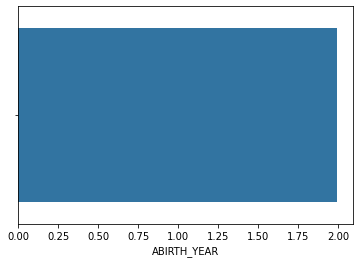

In [18]:
sns.barplot(survey['ABIRTH_YEAR']) #Displaying barplot of column "ABIRTH_YEAR"

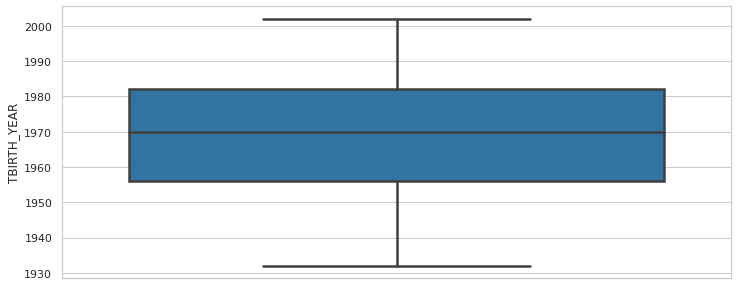

In [67]:
sns.boxplot(y=survey["TBIRTH_YEAR"], linewidth=2.5); ##Displaying boxplot of column "ABIRTH_YEAR"

In [72]:
seriesplot = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10)) # create a series
seriesplot

0    -0.136518
10   -0.086287
20   -0.622423
30    1.031527
40    0.708895
50    1.234629
60   -0.256540
70   -2.059427
80   -1.845984
90   -1.788043
dtype: float64

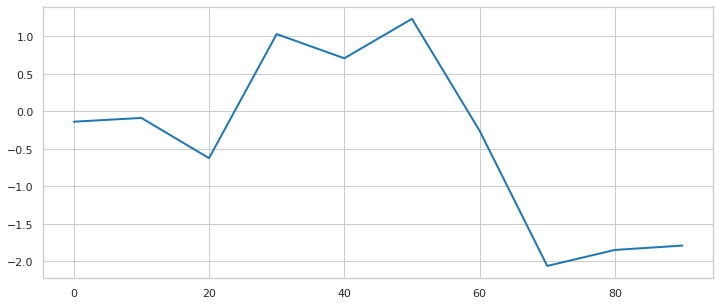

In [73]:
seriesplot.plot() #ploting the data using series plot

In [76]:
lplot = pd.DataFrame(np.random.randn(10, 4),
                  columns=['TBIRTH_YEAR', 'PWEIGHT', 'ABIRTH_YEAR', 'EST_MSA'],
                  index=np.arange(0, 100, 10))
lplot

,TBIRTH_YEAR,PWEIGHT,ABIRTH_YEAR,EST_MSA
0,0.578138,-0.131740,0.173175,1.025872
10,-1.586330,0.133600,-1.060984,1.108373
20,0.128537,-0.322431,-0.724172,-0.286586
30,0.951813,-0.792711,-2.229562,1.661410
40,-1.066941,0.731568,2.699038,0.194340
50,0.191282,0.271161,-0.882460,1.022496
60,-0.030679,-0.994230,-2.187915,1.865778
70,1.900593,0.321251,1.328171,0.006989
80,-0.982349,-1.252102,0.827092,-0.789480
90,-0.814317,-1.787501,1.100789,1.530097


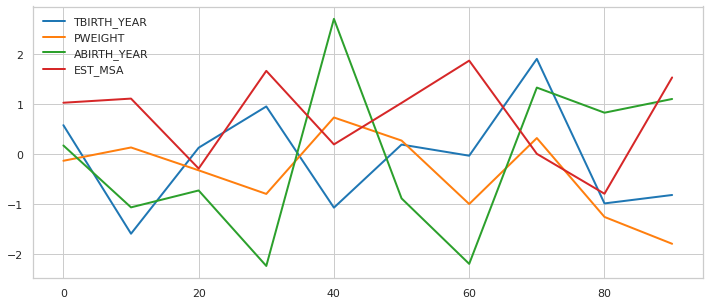

In [77]:
lplot.plot() #Ploting the data using linear plot

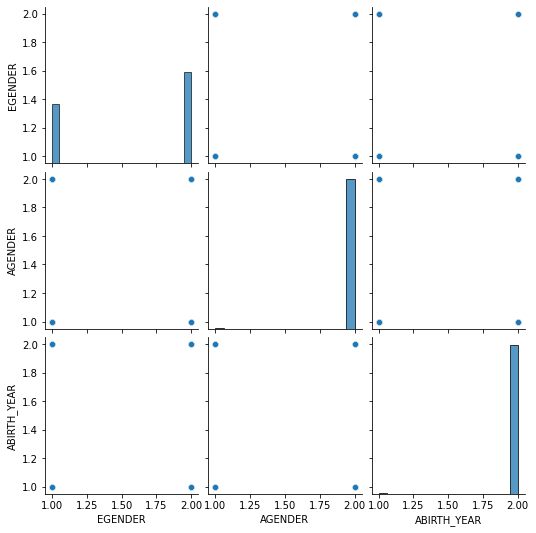

In [19]:
sns.pairplot(survey[["EGENDER","AGENDER","ABIRTH_YEAR"]]) #plot shows the pairplot of "EGENDER","AGENDER","ABIRTH_YEAR" columns in the survey data

In [20]:
ploting= # assign another name ploting for survey data for jointplot for easy understanding

In [21]:
plt.style.use('seaborn-whitegrid')
plt.rc('text',usetex=False)
plt.rc('font',family='serif')
plt.rc('xtick',labelsize=5) 
plt.rc('ytick',labelsize=5) 
plt.rc('font',size=10) 
plt.rc('figure',figsize=(12,5))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1,rc={"lines.linewidth":2,'font.family':[u'times']})

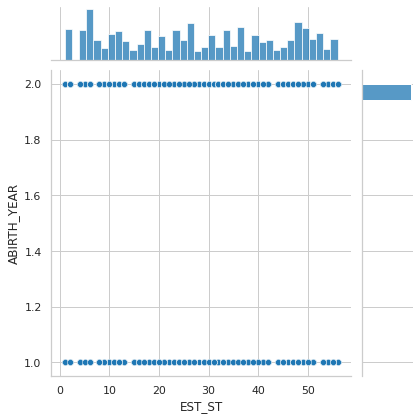

In [22]:
jointploting=sns.jointplot(x="EST_ST", y="ABIRTH_YEAR", data=ploting)
jointploting.savefig("jointploting.jpg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


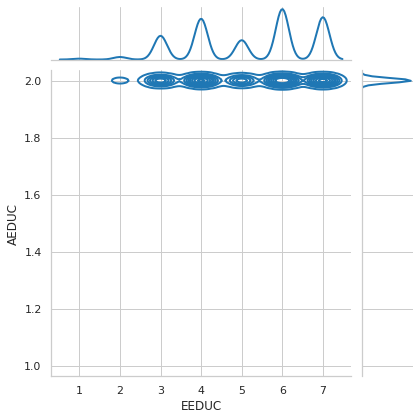

In [23]:
sns.jointplot(survey['EEDUC'], survey['AEDUC'],kind="kde")

In [24]:
ploting.ABIRTH_YEAR.shape #assign the survey data to pres for removing nan and doing some visualization and to understand it easy

(62004,)

In [28]:
pres=pd.read_csv("pulse2020_puf_01.csv")
pres.dataframeName="pulse2020_puf_01.csv"
pres.head()

,SCRAM,WEEK,EST_ST,EST_MSA,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,...,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,1,-99,1,-99,2.0,4.0,4
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,...,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,2
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,8
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,...,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,1
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,...,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,4


In [39]:
remove=pres.drop(['SCRAM', 'EST_MSA'], axis = 1) #Removing columns with string values and nan

In [40]:
remove

,WEEK,EST_ST,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,1,47,1973.489532,1986,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,1,-99,1,-99,2.0,4.0,4
1,1,1,1929.488419,1955,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,2
2,1,26,1526.612380,1976,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,8
3,1,1,2734.635354,1964,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,-88,-88,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,1
4,1,1,681.211425,1963,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74408,1,56,632.943065,1973,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,1,2,-88,-88,2,2,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,0,30,2,4,4,4,3,3,1,2,2,2,2,2,2,1,1,1,2,1,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,5
74409,1,56,503.836089,1956,2,2,2,1,2,1,2,3,2,1,2,2,0,2,2,2,2,1,1,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,50,30,4,3,1,2,2,1,1,2,1,2,2,2,2,-99,2,2,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,-99
74410,1,19,214.985437,1955,2,2,2,1,2,1,2,7,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,2,-99,-99,-99,-99,1,2,-88,-88,-88,-88,-88,-88,-88,80,35,4,2,2,2,1,1,1,-99,-99,-99,-99,-99,-99,-99,1,1,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,5
74411,1,56,158.205899,1982,2,2,2,1,2,1,2,6,2,1,5,2,3,2,2,2,2,2,-88,4,4,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,200,70,4,2,3,2,2,1,1,2,2,2,2,2,2,2,1,1,2,1,4,1,-99,-99,-99,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,2.0,30.0,8


In [41]:
random_state=np.random.RandomState(42) #Creating Training and Test Datasets

In [42]:
X=remove.iloc[:,0:30].values #values converts DataFrame into numpy representation

In [43]:
print(X.shape)
print(type(X))

(74413, 30)
<class 'numpy.ndarray'>


In [44]:
Y=remove.iloc[:,30].values

In [45]:
print(Y.shape)
print(type(Y))

(74413,)
<class 'numpy.ndarray'>


In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=random_state)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(55809, 30) (55809,)
(18604, 30) (18604,)


In [47]:
unique_elements,counts_elements=np.unique(Y_train,return_counts=True) #Check class balance in training set
print(unique_elements)
print(counts_elements)

[-99 -88   1]
[17557 36650  1602]


In [204]:
unique_elements,counts_elements=np.unique(Y_test,return_counts=True) #Check class distribution test set
print(unique_elements)
print(counts_elements)

[-99 -88   1]
[ 5953 12100   551]


In [210]:
sc = StandardScaler() #Feature Scaling
X_train = sc.fit_transform(X_train)

In [208]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform') #Nearest Neighbors(k-NN)
knn.fit(X_train,Y_train) #Train classifer with training set
                         #initialize a KNN classifier

KNeighborsClassifier(n_neighbors=1)

In [90]:
Y_train_predicted=knn.predict(X_train) #Predicting the outcome for the training set

In [91]:
print("Train Classification Accuracy:",knn.score(X_train,Y_train))
print("\n")
print ("Train Confusion Matrix:\n"+str(confusion_matrix(Y_train,Y_train_predicted)))
print("\n")
print("Train Classification Report:\n",classification_report(Y_train,Y_train_predicted))

Train Classification Accuracy: 1.0


Train Confusion Matrix:
[[17557     0     0]
 [    0 36650     0]
 [    0     0  1602]]


Train Classification Report:
               precision    recall  f1-score   support

         -99       1.00      1.00      1.00     17557
         -88       1.00      1.00      1.00     36650
           1       1.00      1.00      1.00      1602

    accuracy                           1.00     55809
   macro avg       1.00      1.00      1.00     55809
weighted avg       1.00      1.00      1.00     55809



In [150]:
some=pd.read_csv("pulse2020_puf_01.csv") #Assigning name for the dataset to remove some columns


In [178]:
s=some.drop(["PWEIGHT","TBIRTH_YEAR","EST_MSA"],axis=1) #Removing the string,nan,TBIRTH_YEAR columns from the data set

In [179]:
s.head()

,SCRAM,WEEK,EST_ST,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,WRKLOSS,EXPCTLOSS,ANYWORK,KINDWORK,RSNNOWRK,UNEMPPAY,PRIFOODSUF,CURFOODSUF,FOODSUFRSN1,FOODSUFRSN2,FOODSUFRSN3,FOODSUFRSN4,FOODSUFRSN5,FREEFOOD,WHEREFREE1,WHEREFREE2,WHEREFREE3,WHEREFREE4,WHEREFREE5,WHEREFREE6,WHEREFREE7,TSPNDFOOD,TSPNDPRPD,FOODCONF,HLTHSTATUS,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,DELAY,NOTGET,TENURE,MORTLMTH,MORTCONF,ENROLL1,ENROLL2,ENROLL3,TEACH1,TEACH2,TEACH3,TEACH4,TEACH5,COMPAVAIL,COMP1,COMP2,COMP3,INTRNTAVAIL,INTRNT1,INTRNT2,INTRNT3,TSCHLHRS,TTCH_HRS,INCOME
0,V010000001S10011099370111,1,47,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2,2,2,1,2,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,100,60,3,2,4,3,1,1,1,2,2,2,2,2,2,2,2,2,3,1,4,1,-99,-99,-99,1,1,-99,-99,1,-99,1,-99,1,-99,1,-99,2.0,4.0,4
1,V010000001S10011900470112,1,1,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1,2,2,2,-88,6,4,3,2,1,-99,-99,-99,-99,2,-88,-88,-88,-88,-88,-88,-88,30,0,2,4,3,4,4,4,2,2,1,2,2,2,2,-99,1,1,2,1,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,2
2,V010000001S18010744940111,1,26,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,150,50,4,1,1,1,1,1,1,2,2,2,2,2,2,2,1,1,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,8
3,V010000001S37010301340112,1,1,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2,1,1,2,-88,8,4,1,2,1,-99,1,-99,1,2,-88,-88,-88,-88,-88,-88,-88,100,100,2,5,4,4,4,4,2,2,2,2,2,2,2,1,1,1,2,3,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,1
4,V010000001S37010480340111,1,1,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1,2,2,1,3,-88,-88,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-88,-88,150,15,4,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,4,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88.0,-88.0,4


In [188]:
sa=s[s.columns[1:18]] #Take only first 18 columns after deleting 3 columns
sa.head()

,WEEK,EST_ST,ABIRTH_YEAR,EGENDER,AGENDER,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT
0,1,47,2,2,2,1,2,1,2,6,2,1,4,2,2,2,2
1,1,1,2,1,2,1,2,1,2,4,2,3,1,2,0,2,1
2,1,26,2,2,2,1,2,4,2,6,2,1,2,2,0,2,2
3,1,1,2,1,2,1,2,1,2,4,2,3,2,2,0,2,2
4,1,1,2,2,2,1,2,1,2,7,2,5,1,2,0,2,1


In [211]:
Y=sa['RHISPANIC'] #Remove RHISPANIC columns and do the training
X=sa.drop(columns=['RHISPANIC'])

In [212]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.25,random_state=42)

In [216]:
logistic=LogisticRegression(penalty="l2",C=1e42,solver='liblinear') #Fit a logistic regression model, C=1e42 is selected to avoid regularization
logistic.fit(X_train,Y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [217]:
print('intercept ',logistic.intercept_[0])
pd.DataFrame({'coeff':logistic.coef_[0]}, index=X.columns)

intercept  0.8797413926349812


,coeff
WEEK,0.879741
EST_ST,-0.010348
ABIRTH_YEAR,-0.171324
EGENDER,0.041404
AGENDER,-0.172151
AHISPANIC,0.987104
RRACE,0.290261
ARACE,-3.569405
EEDUC,-0.209702
AEDUC,0.952617


In [218]:
Y_valid_predicted=logistic.predict(X_valid) #Predicting Y on the validation set and et the predicted probabilties for each class and display in a DataFrame
Y_valid_pred_prob=logistic.predict_proba(X_valid)
logistic_result=pd.DataFrame({'actual_class':Y_valid,'P(Y=0)':[p[0] for p in Y_valid_pred_prob],'P(Y=1)':[p[1] for p in Y_valid_pred_prob],'predicted_class':Y_valid_predicted})

logistic_result[logistic_result.predicted_class == 1].head()

,actual_class,P(Y=0),P(Y=1),predicted_class
1278,1,0.963407,0.036593,1
61463,1,0.914668,0.085332,1
23578,1,0.941615,0.058385,1
15951,1,0.916737,0.083263,1
54554,1,0.923102,0.076898,1


In [219]:
logistic_result[logistic_result.predicted_class == 0].head()

,actual_class,P(Y=0),P(Y=1),predicted_class


In [220]:
conf_matrix=confusion_matrix(Y_valid,Y_valid_predicted)
print('------------Logistic Regression------------')
print("Validation Set Classification accuracy:",logistic.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n"+str(confusion_matrix))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_predicted))

------------Logistic Regression------------
Validation Set Classification accuracy: 0.929101268544399


Validation Set Confusion matrix: 
<function confusion_matrix at 0x7fa27f3b2a70>


Validation Set Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.96     17142
           2       0.74      0.15      0.25      1462

    accuracy                           0.93     18604
   macro avg       0.84      0.57      0.61     18604
weighted avg       0.92      0.93      0.91     18604



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[17066    76]
 [ 1243   219]]


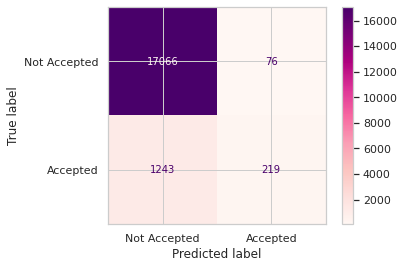

In [221]:
distplot=plot_confusion_matrix(logistic,X_valid,Y_valid,display_labels=['Not Accepted','Accepted'],cmap=plt.cm.RdPu,normalize=None)
print(distplot.confusion_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Area under the ROC: 0.6972171453989936


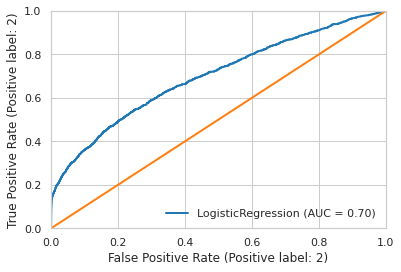

In [222]:
pl=plot_roc_curve(logistic,X_valid,Y_valid)
print('Area under the ROC:',pl.roc_auc)   
plt.plot([0, 1],[0, 1])
plt.xlim([0.0,1.0]) 
plt.ylim([0.0,1.0])
plt.show();

In [62]:
pd.crosstab(survey.EST_MSA,survey.TBIRTH_YEAR,survey.PWEIGHT,aggfunc = sum, normalize='index') #Crosstab function for the EST_MSA,TBIRTH_YEAR,PWEIGHT columns in the survey dataset

TBIRTH_YEAR,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
EST_MSA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12060.0,0.003056,0.000566,0.000000,0.000000,0.003278,0.000000,0.000099,0.005731,0.001108,0.008294,0.001313,0.014302,0.007019,0.005385,0.005300,0.004050,0.004485,0.016885,0.007617,0.013271,0.007226,0.014657,0.024867,0.016314,0.013816,0.020288,0.025683,0.009638,0.020681,0.024149,0.014249,0.019047,0.013561,0.026722,0.016799,0.014221,0.017580,0.019499,0.029570,0.015622,0.021359,0.010532,0.016755,0.016647,0.020879,0.013983,0.025693,0.022719,0.019563,0.023791,0.014692,0.016618,0.021640,0.014786,0.021587,0.013351,0.024172,0.013066,0.028275,0.024829,0.031011,0.023005,0.009605,0.020919,0.008556,0.012402,0.012172,0.004680,0.011895,0.000000,0.014874
14460.0,0.003592,0.007410,0.003279,0.004651,0.004747,0.003614,0.001149,0.006286,0.006374,0.002192,0.006869,0.006934,0.003127,0.012838,0.008226,0.006249,0.011434,0.008954,0.022432,0.022208,0.010644,0.009328,0.009092,0.014750,0.019483,0.013572,0.012097,0.011752,0.029608,0.010509,0.015134,0.021710,0.012040,0.019004,0.020962,0.023169,0.020522,0.016320,0.024272,0.026151,0.021525,0.011534,0.008634,0.017549,0.015035,0.010583,0.010440,0.024056,0.014678,0.013637,0.014715,0.030530,0.014942,0.020166,0.030170,0.018395,0.016977,0.032808,0.017491,0.021448,0.033133,0.021322,0.014154,0.012647,0.012302,0.008572,0.014883,0.009263,0.006177,0.007261,0.002292
16980.0,0.009564,0.000000,0.000326,0.000986,0.000000,0.003327,0.007238,0.001568,0.000320,0.004711,0.004483,0.011978,0.003065,0.003539,0.005295,0.005475,0.006449,0.004010,0.010180,0.008498,0.014409,0.013442,0.007891,0.018098,0.027072,0.016548,0.023765,0.013409,0.011419,0.017398,0.011785,0.032887,0.018348,0.014495,0.009841,0.018732,0.014022,0.032012,0.026025,0.027698,0.019934,0.023100,0.021172,0.019107,0.017580,0.022917,0.020903,0.013092,0.011989,0.025116,0.017936,0.016164,0.016168,0.014766,0.021989,0.049036,0.028449,0.015201,0.020455,0.031470,0.025800,0.020163,0.012283,0.018246,0.009298,0.004946,0.008938,0.006902,0.000000,0.004335,0.002238
19100.0,0.001501,0.000357,0.000000,0.000000,0.000283,0.001364,0.003574,0.002121,0.012297,0.002228,0.003800,0.004992,0.004833,0.007309,0.007432,0.004521,0.016117,0.016953,0.004132,0.007011,0.013486,0.004559,0.006648,0.007112,0.012968,0.027450,0.006840,0.002750,0.023461,0.018166,0.017371,0.012782,0.055061,0.019868,0.003325,0.019332,0.022326,0.036780,0.010549,0.013043,0.012232,0.007359,0.015290,0.024602,0.010167,0.012633,0.016552,0.011283,0.024326,0.030656,0.014341,0.024003,0.012566,0.007602,0.026091,0.026258,0.028378,0.026340,0.025573,0.017894,0.028891,0.018781,0.017971,0.020802,0.013755,0.016066,0.024434,0.013181,0.009541,0.010066,0.017661
19820.0,0.005202,0.000000,0.000000,0.004093,0.003319,0.000889,0.002082,0.008804,0.007528,0.003089,0.003349,0.008038,0.009396,0.007038,0.026571,0.007848,0.005526,0.011315,0.009756,0.008410,0.008157,0.031572,0.014820,0.016798,0.017798,0.011677,0.023321,0.021160,0.024507,0.031914,0.013517,0.024682,0.010434,0.016457,0.022602,0.016598,0.030024,0.020068,0.013371,0.022086,0.014533,0.016971,0.022532,0.019299,0.011307,0.018625,0.012279,0.017645,0.013737,0.013577,0.015711,0.016296,0.024332,0.013896,0.017838,0.022720,0.017012,0.015672,0.013640,0.031089,0.027700,0.021813,0.009984,0.015164,0.015200,0.012772,0.014451,0.004630,0.000000,0.000000,0.005760
26420.0,0.000394,0.000427,0.000000,0.003858,0.000852,0.001069,0.005251,0.005347,0.000000,0.000427,0.004694,0.003937,0.001803,0.006476,0.017441,0.007611,0.006348,0.008286,0.013376,0.012384,0.033707,0.009202,0.009799,0.018731,0.015016,0.016940,0.011954,0.015670,0.012655,0.017826,0.014829,0.013020,0.008798,0.015507,0.010

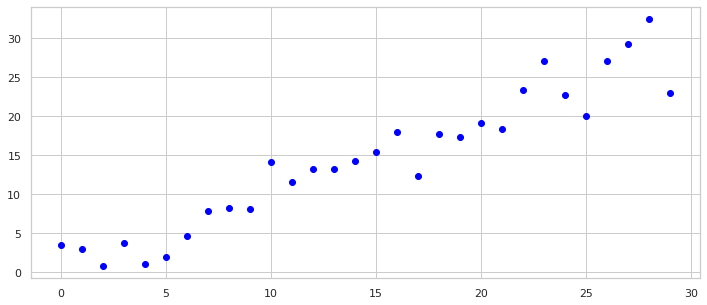

In [49]:
x=np.arange(30) #scatterplot x,y values
y=np.arange(30)+3 * np.random.randn(30)
plt.scatter(x,y,color='blue',marker='o');

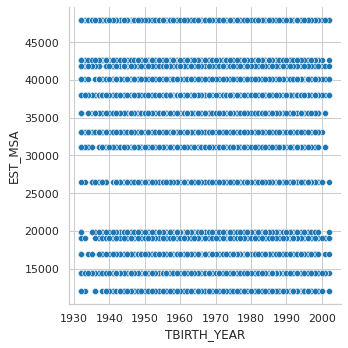

In [50]:
plot1=sns.relplot(x="TBIRTH_YEAR", y="EST_MSA", data=survey) #Relational plot for TBIRTH_YEAR and EST_MSA column as x and y in survey data
plot1.savefig("plot1.jpg")

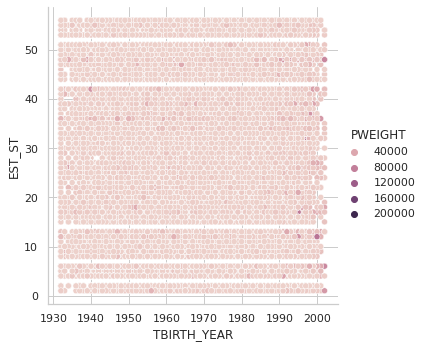

In [51]:
sns.relplot(x="TBIRTH_YEAR", y="EST_ST", hue="PWEIGHT", data=survey); #Relational plot for TBIRTH_YEAR as x and EST_ST as y and having hue as PWEIGHT 

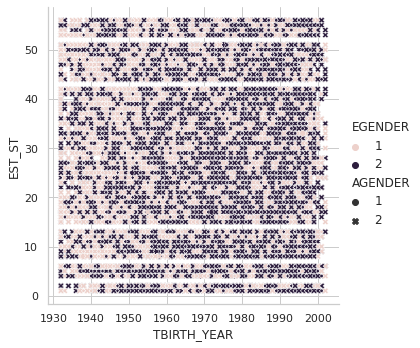

In [52]:
sns.relplot(x="TBIRTH_YEAR", y="EST_ST", hue="EGENDER", style="AGENDER", data=survey); #Relational plot for TBIRTH_YEAR as x, EST_ST as y and having hue as EGENDER and style as AGENDER.

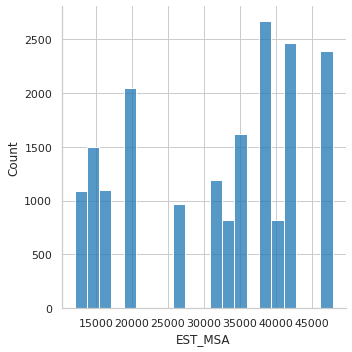

In [224]:
sns.displot(survey, x="EST_MSA") #Dist plot for single selected column

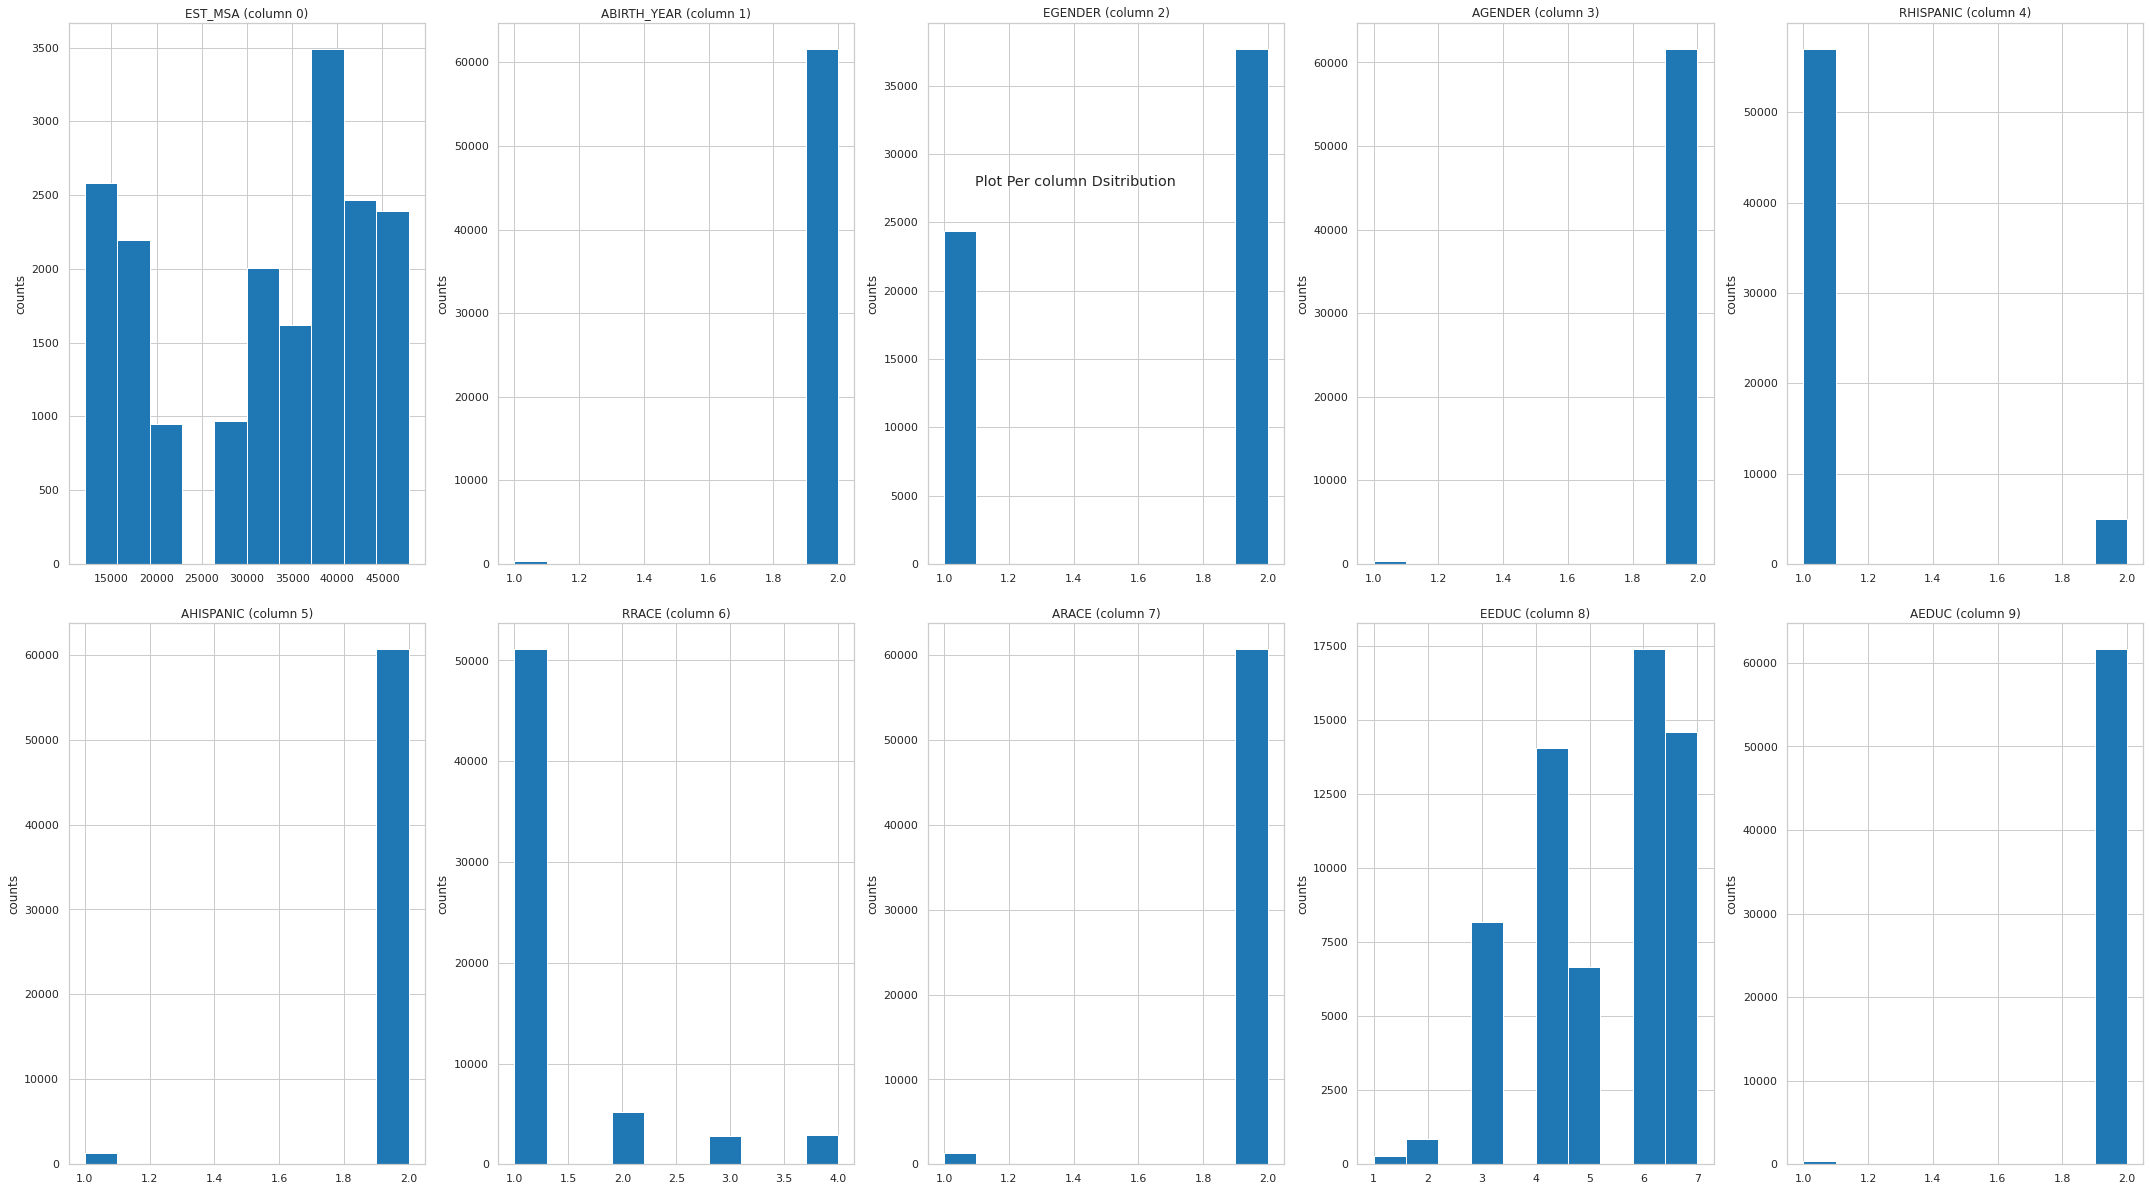

In [106]:
def ColumnDistribution(df, graph, graphPerRow): #Dist plot for all the columns in the dataset
    nunique = df.nunique()
    df = df[[column for column in df if nunique[column] > 1 and nunique[column] < 50]]
    nRow, nColumn = df.shape
    columnNames = list(df)
    graphRow = (nColumn + graphPerRow - 1) / graphPerRow
    plt.figure(num = None, figsize = (6 * graphPerRow, 8 * graphRow))
    for i in range(min(nColumn, graph)):
        plt.subplot(graphRow, graphPerRow, i + 1)
        allcolumns = df.iloc[:, i]
        if (not np.issubdtype(type(allcolumns.iloc[0]), np.number)):
            Counts = allcolumns.counts()
            Counts.plot.bar()
        else:
            allcolumns.hist()
        plt.ylabel('counts')
        plt.title(f'{columnNames[i]} (column {i})')
        plt.suptitle("Plot Per column Dsitribution")
        plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 2.0)
    plt.show()
ColumnDistribution(survey, 10, 5)

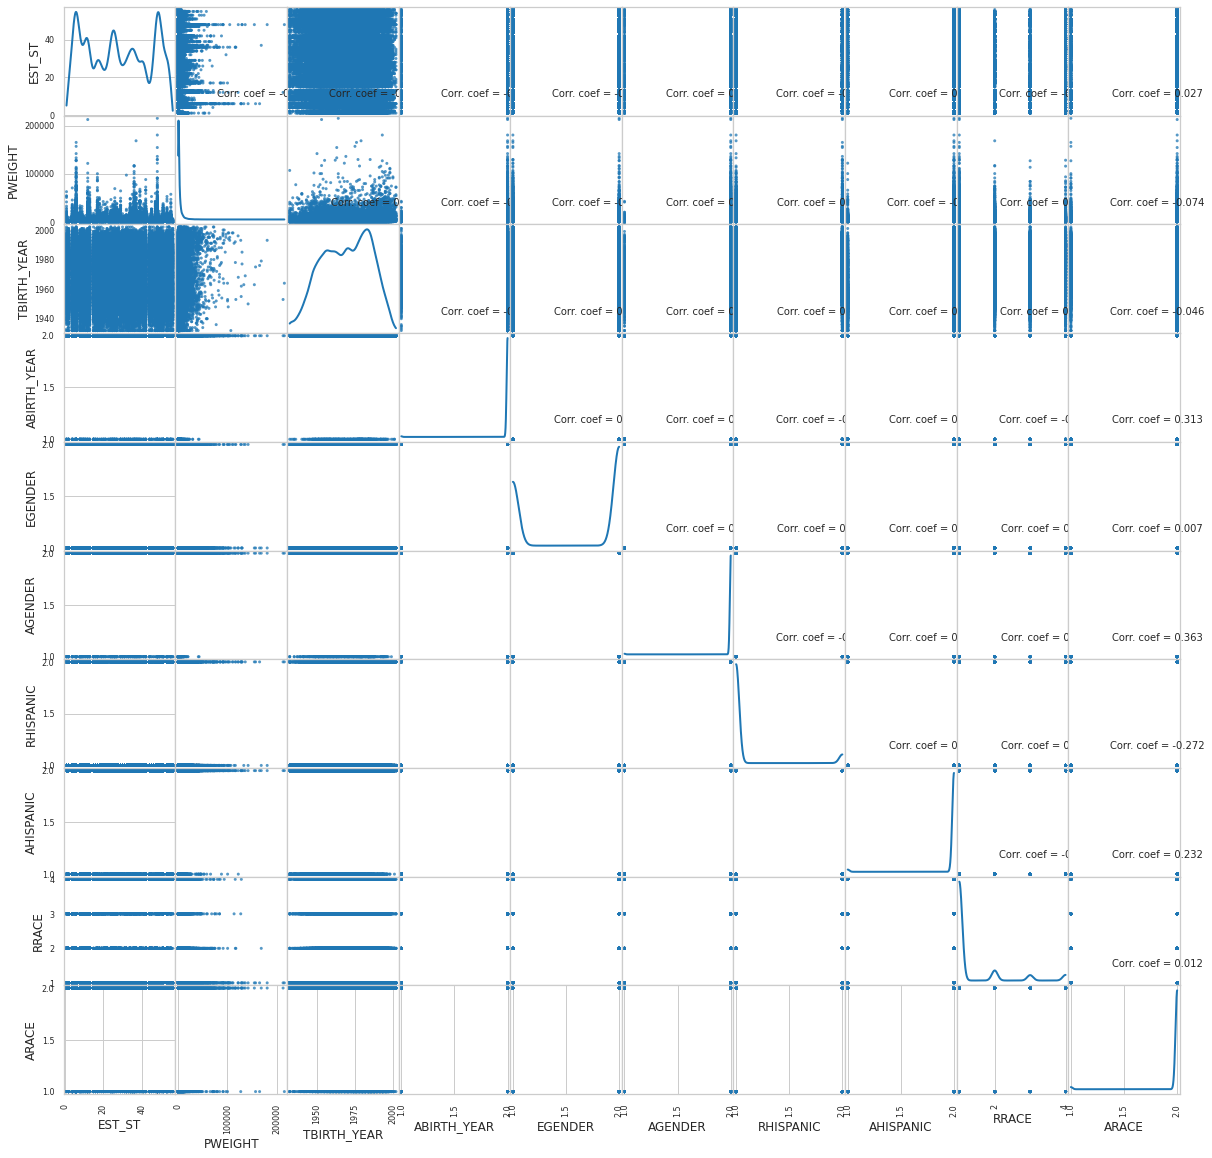

In [108]:
def ScatterMatrix(df, plotSize, textSize): #Scatter matrix for the survey data showing the matrix of all the columns present in the survey data and also displaying correlation coeffient of the data as we seen cross format of the below diagram
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[column for column in df if df[column].nunique()>1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize,plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.show()
ScatterMatrix(survey, 20, 10)

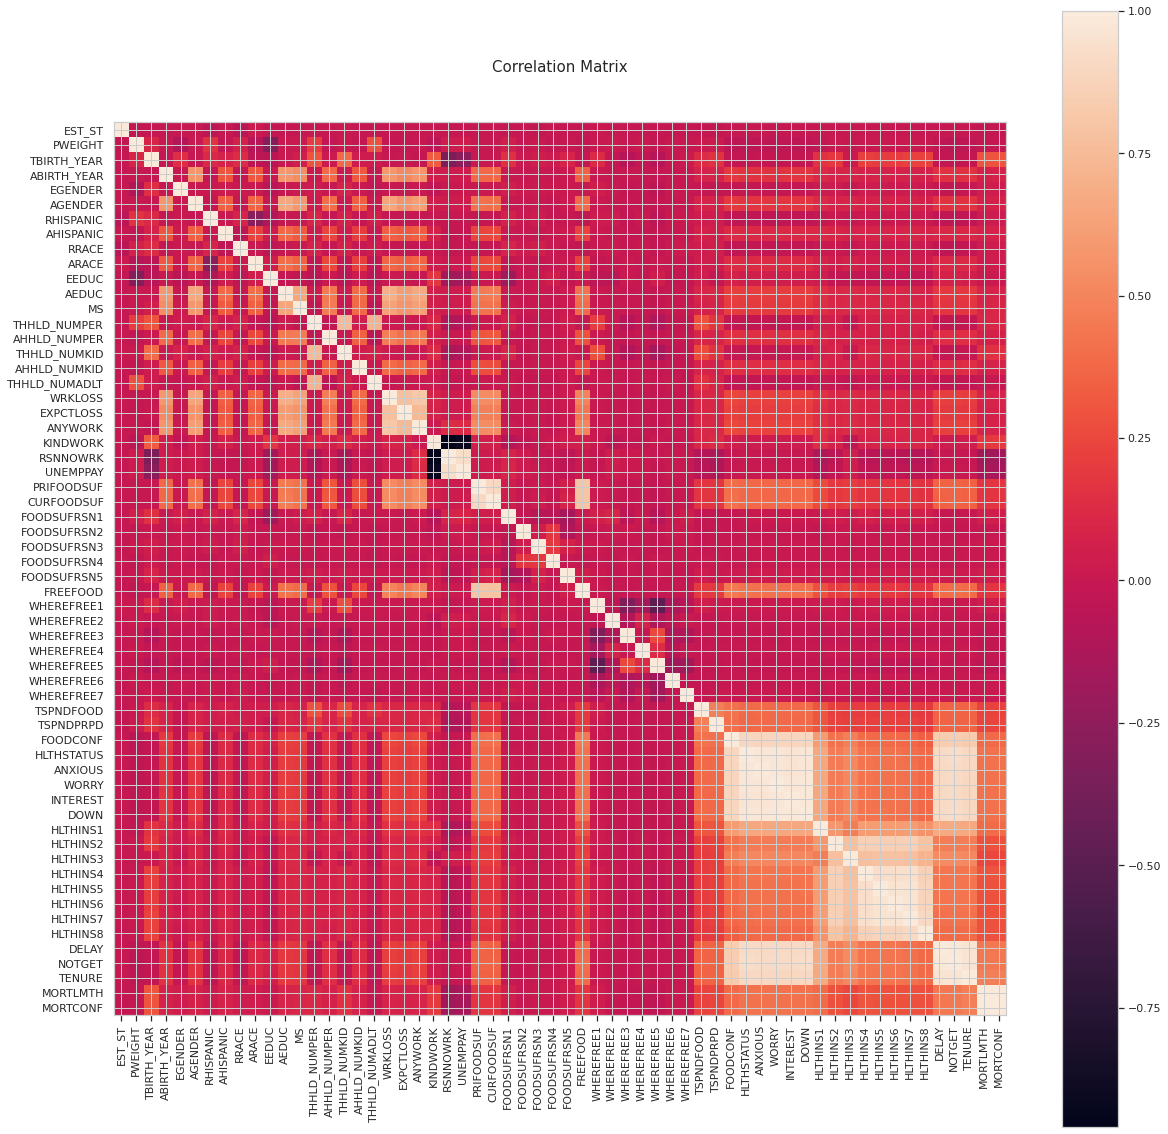

In [109]:
def CorrelationMatrix(df, graphWidth): #Showing the correlation matrix of the survey data along with the range required for each column
    survey = df.dataframeName
    df = df.dropna('columns') 
    df = df[[column for column in df if df[column].nunique()>1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth,graphWidth))
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()
CorrelationMatrix(survey, 20)